In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('./multiTimeline.csv')
df

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
...,...,...,...,...
163,2017-08,46,52,43
164,2017-09,44,50,47
165,2017-10,44,47,45
166,2017-11,41,47,47


In [3]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [7]:
df.month = pd.to_datetime(df.month)
df

,month,diet,gym,finance
0,2004-01-01,100,31,48
1,2004-02-01,75,26,49
2,2004-03-01,67,24,47
3,2004-04-01,70,22,48
4,2004-05-01,72,22,43
...,...,...,...,...
163,2017-08-01,46,52,43
164,2017-09-01,44,50,47
165,2017-10-01,44,47,45
166,2017-11-01,41,47,47


In [8]:
# index 설정

df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'year')

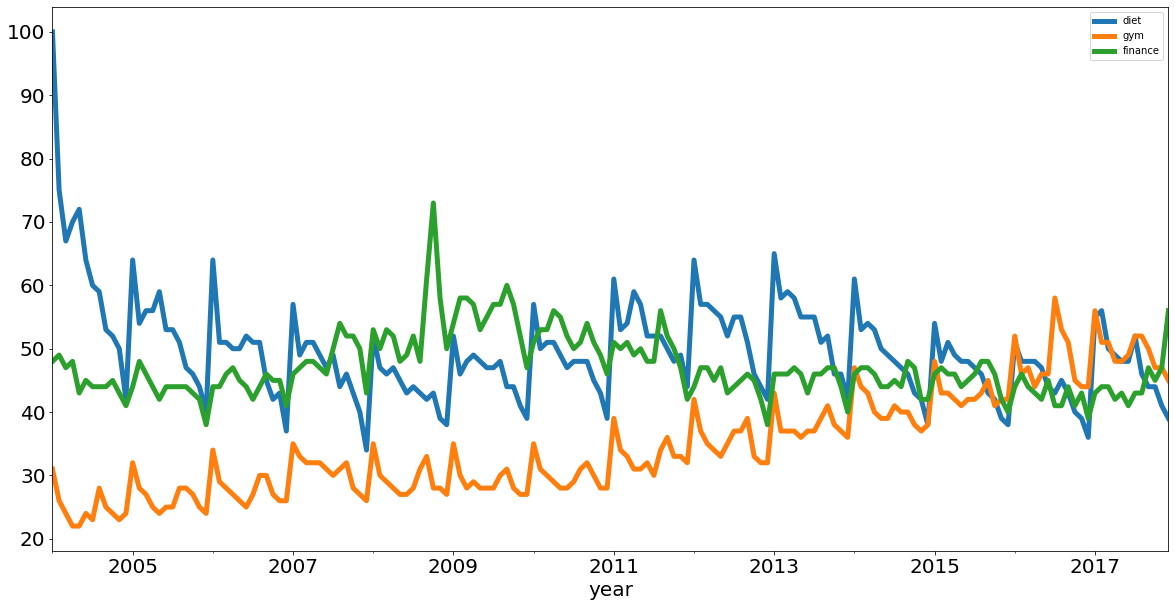

In [10]:
# 3개의 컬럼에 대한 시계열 곡선

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'year')

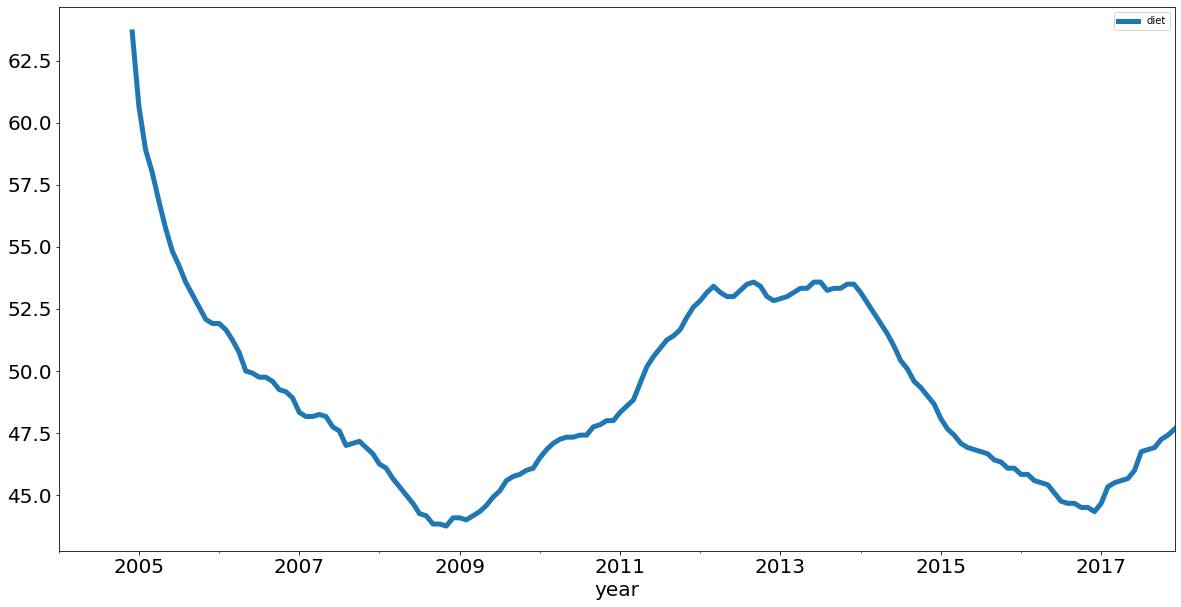

In [13]:
# 12 사이즈 이동평균

diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'year')

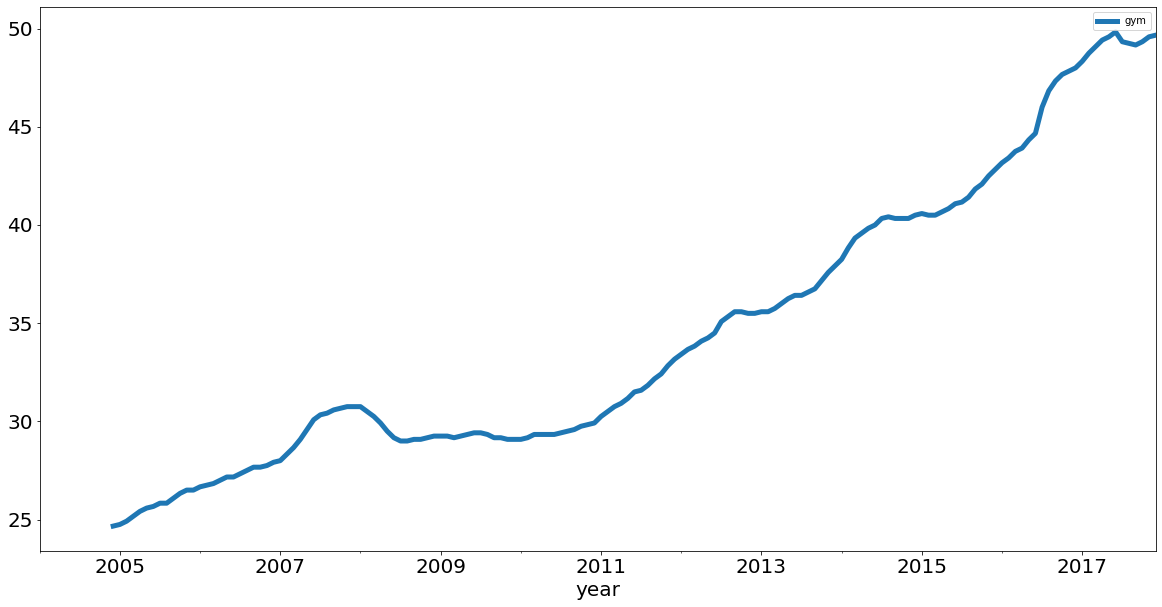

In [14]:
# 12 사이즈 이동평균

diet = df[['gym']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'year')

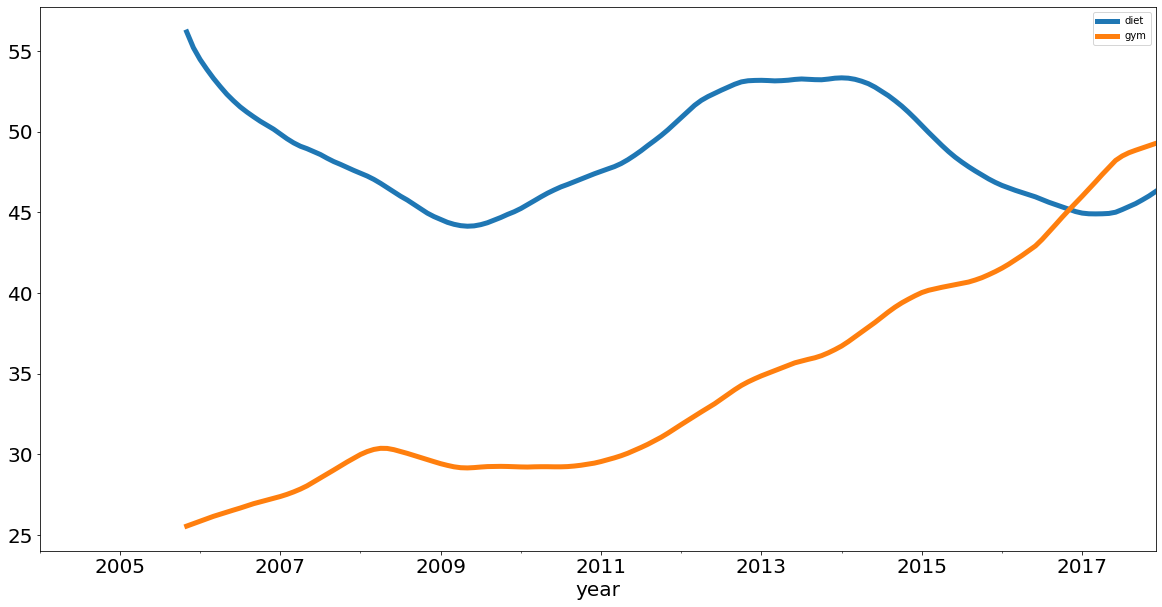

In [18]:
# 12 사이즈 이동평균

diet = pd.concat([df.diet.rolling(12).mean(), df.gym.rolling(12).mean()], axis=1)
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'year')

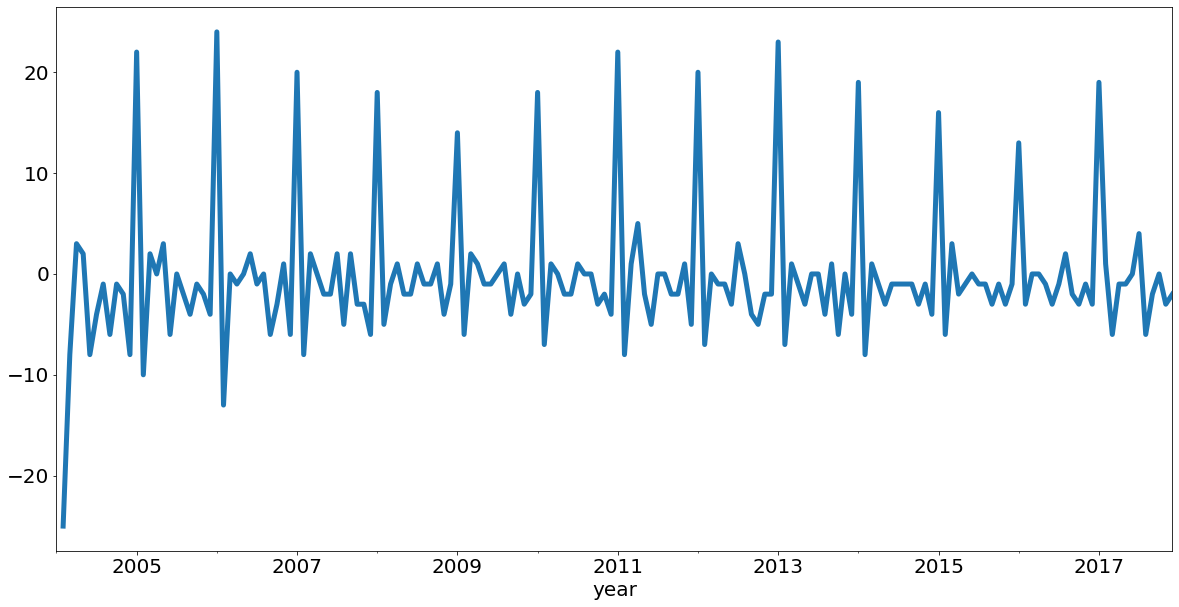

In [22]:
# 다이어트 곡선에 대한 차분(diff) 그래프

df.diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

# 결과해석
# 차분 결과 ,비정상성 곡선 >> 정상성 띤 곡선으로 변경 확인

In [23]:
df.corr()

# gym, finance 역의 상관관계 확인

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5, 0, 'year')

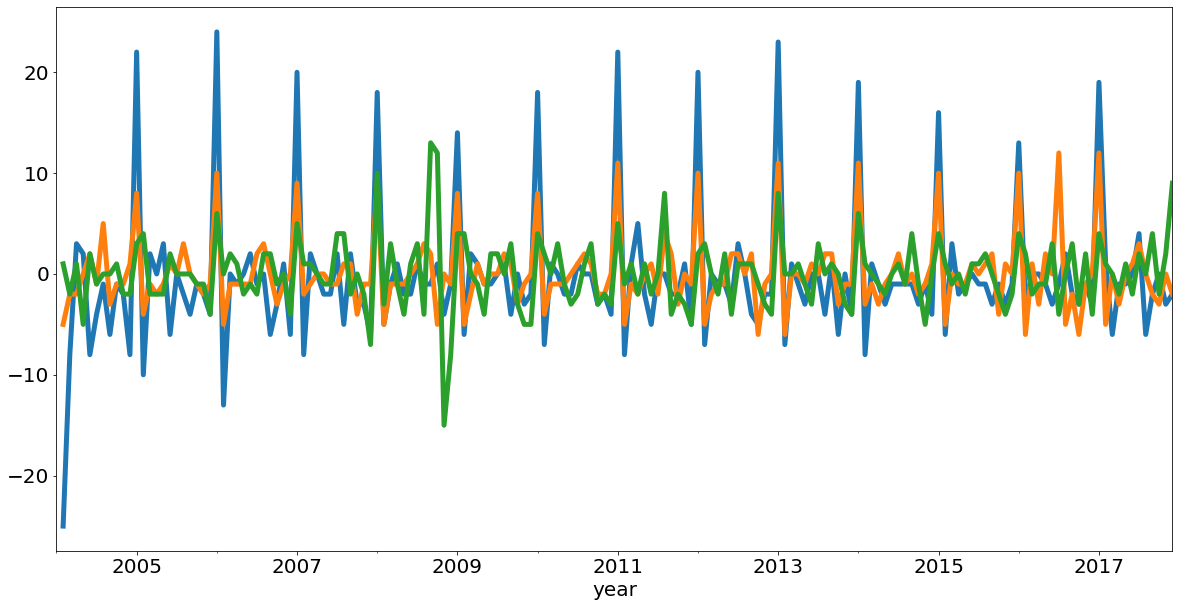

In [24]:
df.diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)
df.gym.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)
df.finance.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

In [25]:
# 차분에 대한 상관관계 행렬

df.diff().corr()
# diet 변하면 gym도 쉽게 변함을 확인

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000
